# Índice <a name="Contents"></a>
1. [Importando bibliotecas](#import)
2. [Construindo o dataframe](#read)
3. [Categorização](#categorizacao)
3. [Construindo dummies](#dummies)


# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import pandas as pd
import numpy  as np

# 2. Construindo o dataframe <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
df_imc = pd.DataFrame({
    'nome': [
        'Fernando', 'Maria', 'Felipe', 'Pedro', 'Bianca',
        'Beatriz', 'Patricia', 'Lucia'
    ],
    'imc': [27, 26, 25, 16, 16.7, 17.5, 18.6, 24]
})
df_imc

,nome,imc
0,Fernando,27.0
1,Maria,26.0
2,Felipe,25.0
3,Pedro,16.0
4,Bianca,16.7
5,Beatriz,17.5
6,Patricia,18.6
7,Lucia,24.0


# 3. Categorização <a name="categorizacao"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

É transformar os dados numéricos em categorias, exemplo:
- Clientes de bancos categorizados a partir do valor investido no banco: Diamante, Platina, Ouro
- Classe social baseada na renda familiar: A, B, C, D e E
- Empresas categorizadas a partir do seu valor de mercado: Micro caps, small caps, mid caps e large caps
- Pessoas categorizadas a partir do seu IMC: Abaixo do peso, normal, acima, obesidade e etc.

In [3]:
df_imc

,nome,imc
0,Fernando,27.0
1,Maria,26.0
2,Felipe,25.0
3,Pedro,16.0
4,Bianca,16.7
5,Beatriz,17.5
6,Patricia,18.6
7,Lucia,24.0


## Nas faixas da OMS

- Muito abaixo do peso: 16 a 16,9 kg/m2
- Abaixo do peso: 17 a 18,4 kg/m2
- Peso normal: 18,5 a 24,9 kg/m2
- Acima do peso: 25 a 29,9 kg/m2

In [4]:
df_imc.loc[df_imc['imc'] <= 16.9, 'imc_cat'] = 'muito_abaixo'
df_imc.loc[(df_imc['imc'] > 16.9) & (df_imc['imc'] <= 18.4),
           'imc_cat'] = 'abaixo'
df_imc.loc[(df_imc['imc'] > 18.4) & (df_imc['imc'] <= 24.9),
           'imc_cat'] = 'normal'
df_imc.loc[(df_imc['imc'] > 24.9), 'imc_cat'] = 'acima'

In [5]:
df_imc

,nome,imc,imc_cat
0,Fernando,27.0,acima
1,Maria,26.0,acima
2,Felipe,25.0,acima
3,Pedro,16.0,muito_abaixo
4,Bianca,16.7,muito_abaixo
5,Beatriz,17.5,abaixo
6,Patricia,18.6,normal
7,Lucia,24.0,normal


## Em saudável e não saudável

- Não saudável: < 18,5 kg/m2
- Saudável: 18,5 a 24,9 kg/m2
- Não saudável: > 25 kg/m2

In [6]:
df_imc.loc[:,'imc_cat_2'] = 'nao_saudavel'
df_imc.loc[(df_imc['imc']>18.4) & (df_imc['imc']<=24.9),'imc_cat_2'] = 'saudavel'
df_imc

,nome,imc,imc_cat,imc_cat_2
0,Fernando,27.0,acima,nao_saudavel
1,Maria,26.0,acima,nao_saudavel
2,Felipe,25.0,acima,nao_saudavel
3,Pedro,16.0,muito_abaixo,nao_saudavel
4,Bianca,16.7,muito_abaixo,nao_saudavel
5,Beatriz,17.5,abaixo,nao_saudavel
6,Patricia,18.6,normal,saudavel
7,Lucia,24.0,normal,saudavel


## Em quartis

- 1o_quartil : 0%  a 25%  primeiros valores
- 2o_quartil : 25% a 50%  primeiros valores
- 3o_quartil : 50% a 75%  primeiros valores
- 4o_quartil : 75% a 100% primeiros valores

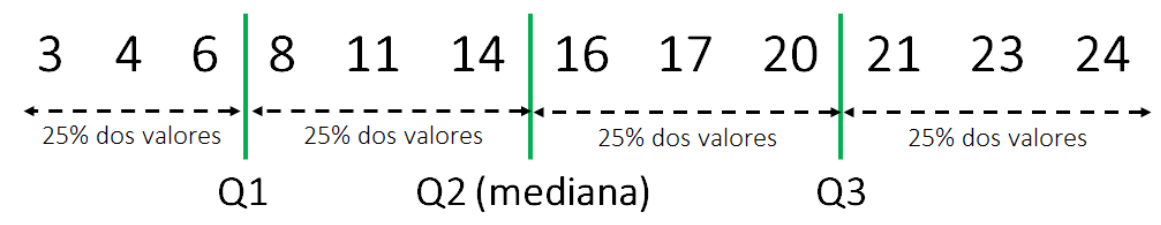
<div style="text-align: right"
     
https://bit.ly/3cndKkh

In [7]:
df_imc['imc'].sort_values()

3    16.0
4    16.7
5    17.5
6    18.6
7    24.0
2    25.0
1    26.0
0    27.0
Name: imc, dtype: float64

In [8]:
df_imc['imc'].quantile([0.25,0.5,0.75])

0.25    17.30
0.50    21.30
0.75    25.25
Name: imc, dtype: float64

In [9]:
quartil_1, quartil_2, quartil_3 = df_imc['imc'].quantile([0.25,0.5,0.75])

In [10]:
df_imc['imc_cat_3'] = np.where(
    df_imc['imc'] < 17.3, '1o_quartil',
    np.where(df_imc['imc'] < 21.3, '2o_quartil',
             np.where(df_imc['imc'] < 25.25, '3o_quartil', '4o_quartil')))

In [11]:
df_imc.sort_values('imc')

,nome,imc,imc_cat,imc_cat_2,imc_cat_3
3,Pedro,16.0,muito_abaixo,nao_saudavel,1o_quartil
4,Bianca,16.7,muito_abaixo,nao_saudavel,1o_quartil
5,Beatriz,17.5,abaixo,nao_saudavel,2o_quartil
6,Patricia,18.6,normal,saudavel,2o_quartil
7,Lucia,24.0,normal,saudavel,3o_quartil
2,Felipe,25.0,acima,nao_saudavel,3o_quartil
1,Maria,26.0,acima,nao_saudavel,4o_quartil
0,Fernando,27.0,acima,nao_saudavel,4o_quartil


# 4. Construindo dummies <a name="dummies"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

``pd.get_dummies()`` é usado para transformar uma variável categórica em variáveis flag

In [12]:
df_imc['imc_cat']

0           acima
1           acima
2           acima
3    muito_abaixo
4    muito_abaixo
5          abaixo
6          normal
7          normal
Name: imc_cat, dtype: object

In [13]:
pd.get_dummies(df_imc['imc_cat'])

,abaixo,acima,muito_abaixo,normal
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
5,1,0,0,0
6,0,0,0,1
7,0,0,0,1


In [14]:
pd.get_dummies(df_imc['imc_cat'],drop_first=True)

,acima,muito_abaixo,normal
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
5,0,0,0
6,0,0,1
7,0,0,1


## Dummie OMS

In [15]:
dummies = pd.get_dummies(df_imc['imc_cat'])

In [16]:
pd.concat([df_imc, dummies], axis=1)

,nome,imc,imc_cat,imc_cat_2,imc_cat_3,abaixo,acima,muito_abaixo,normal
0,Fernando,27.0,acima,nao_saudavel,4o_quartil,0,1,0,0
1,Maria,26.0,acima,nao_saudavel,4o_quartil,0,1,0,0
2,Felipe,25.0,acima,nao_saudavel,3o_quartil,0,1,0,0
3,Pedro,16.0,muito_abaixo,nao_saudavel,1o_quartil,0,0,1,0
4,Bianca,16.7,muito_abaixo,nao_saudavel,1o_quartil,0,0,1,0
5,Beatriz,17.5,abaixo,nao_saudavel,2o_quartil,1,0,0,0
6,Patricia,18.6,normal,saudavel,2o_quartil,0,0,0,1
7,Lucia,24.0,normal,saudavel,3o_quartil,0,0,0,1


## Dummie saudavel

In [17]:
dummies_2 = pd.get_dummies(df_imc['imc_cat_2'])
pd.concat([df_imc, dummies_2], axis=1)

,nome,imc,imc_cat,imc_cat_2,imc_cat_3,nao_saudavel,saudavel
0,Fernando,27.0,acima,nao_saudavel,4o_quartil,1,0
1,Maria,26.0,acima,nao_saudavel,4o_quartil,1,0
2,Felipe,25.0,acima,nao_saudavel,3o_quartil,1,0
3,Pedro,16.0,muito_abaixo,nao_saudavel,1o_quartil,1,0
4,Bianca,16.7,muito_abaixo,nao_saudavel,1o_quartil,1,0
5,Beatriz,17.5,abaixo,nao_saudavel,2o_quartil,1,0
6,Patricia,18.6,normal,saudavel,2o_quartil,0,1
7,Lucia,24.0,normal,saudavel,3o_quartil,0,1


## Dummie quartil

In [18]:
dummies_3 = pd.get_dummies(df_imc['imc_cat_3'])
pd.concat([df_imc, dummies_3], axis=1)

,nome,imc,imc_cat,imc_cat_2,imc_cat_3,1o_quartil,2o_quartil,3o_quartil,4o_quartil
0,Fernando,27.0,acima,nao_saudavel,4o_quartil,0,0,0,1
1,Maria,26.0,acima,nao_saudavel,4o_quartil,0,0,0,1
2,Felipe,25.0,acima,nao_saudavel,3o_quartil,0,0,1,0
3,Pedro,16.0,muito_abaixo,nao_saudavel,1o_quartil,1,0,0,0
4,Bianca,16.7,muito_abaixo,nao_saudavel,1o_quartil,1,0,0,0
5,Beatriz,17.5,abaixo,nao_saudavel,2o_quartil,0,1,0,0
6,Patricia,18.6,normal,saudavel,2o_quartil,0,1,0,0
7,Lucia,24.0,normal,saudavel,3o_quartil,0,0,1,0
